<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Clustering-Parameters" data-toc-modified-id="Clustering-Parameters-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Clustering Parameters</a></span></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load Data</a></span><ul class="toc-item"><li><span><a href="#Cell-metadata" data-toc-modified-id="Cell-metadata-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Cell metadata</a></span></li><li><span><a href="#Gene-Metadata" data-toc-modified-id="Gene-Metadata-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Gene Metadata</a></span></li><li><span><a href="#MCDS" data-toc-modified-id="MCDS-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>MCDS</a></span><ul class="toc-item"><li><span><a href="#MCDS-format" data-toc-modified-id="MCDS-format-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>MCDS format</a></span></li></ul></li></ul></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Filter-Chrom100k-by-cov" data-toc-modified-id="Filter-Chrom100k-by-cov-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Filter Chrom100k by cov</a></span><ul class="toc-item"><li><span><a href="#Apply-filter" data-toc-modified-id="Apply-filter-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Apply filter</a></span></li></ul></li><li><span><a href="#Calculate-mC-rate-matrix" data-toc-modified-id="Calculate-mC-rate-matrix-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Calculate mC rate matrix</a></span><ul class="toc-item"><li><span><a href="#Chrombin-rate" data-toc-modified-id="Chrombin-rate-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Chrombin rate</a></span></li></ul></li><li><span><a href="#Select-2D-matrix-to-do-clustering" data-toc-modified-id="Select-2D-matrix-to-do-clustering-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Select 2D matrix to do clustering</a></span></li><li><span><a href="#Calculate-highly-variable-feature" data-toc-modified-id="Calculate-highly-variable-feature-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Calculate highly variable feature</a></span><ul class="toc-item"><li><span><a href="#mCH" data-toc-modified-id="mCH-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>mCH</a></span></li><li><span><a href="#mCG" data-toc-modified-id="mCG-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>mCG</a></span></li><li><span><a href="#Apply-feature-selection" data-toc-modified-id="Apply-feature-selection-3.4.3"><span class="toc-item-num">3.4.3&nbsp;&nbsp;</span>Apply feature selection</a></span></li></ul></li></ul></li><li><span><a href="#Dimention-reduction" data-toc-modified-id="Dimention-reduction-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Dimention reduction</a></span><ul class="toc-item"><li><span><a href="#Scale-data" data-toc-modified-id="Scale-data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Scale data</a></span></li><li><span><a href="#PCA-separately" data-toc-modified-id="PCA-separately-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>PCA separately</a></span><ul class="toc-item"><li><span><a href="#CH-PCA" data-toc-modified-id="CH-PCA-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>CH PCA</a></span></li><li><span><a href="#CG-PCA" data-toc-modified-id="CG-PCA-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>CG PCA</a></span></li><li><span><a href="#Concatenate-PC" data-toc-modified-id="Concatenate-PC-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Concatenate PC</a></span></li></ul></li></ul></li><li><span><a href="#Batch-correction" data-toc-modified-id="Batch-correction-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Batch correction</a></span></li><li><span><a href="#Clustering" data-toc-modified-id="Clustering-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Clustering</a></span><ul class="toc-item"><li><span><a href="#KNN" data-toc-modified-id="KNN-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>KNN</a></span></li><li><span><a href="#Leiden" data-toc-modified-id="Leiden-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Leiden</a></span></li><li><span><a href="#Manifold-Learning" data-toc-modified-id="Manifold-Learning-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Manifold Learning</a></span></li></ul></li></ul></div>

# Methylation Clustering


In [1]:
import configparser
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy.api as sc
import seaborn as sns
import xarray as xr

# cemba_data package is here: https://github.com/lhqing/cemba_data
# ALLCools package is here: https://github.com/lhqing/ALLCools
from cemba_data.local.mc.prepare_study import prepare_study
from cemba_data.plot import *
from cemba_data.plot.preprocessing import *
from cemba_data.tools.hdf5.anndata import highly_variable_methylation_feature
from cemba_data.tools.hdf5.netndf import MCDS
from cemba_data.tools.hdf5.anndata import rank_features_groups

%matplotlib inline

In [2]:
study_name = 'MOp_mC_clustering.S1'
result_dir = pathlib.Path(f'./{study_name}')
result_dir.mkdir(exist_ok=True)
fig_dir = result_dir / 'fig'
fig_dir.mkdir(exist_ok=True)

## Clustering Parameters

In [3]:
clustering_feature = 'gene'

# preprocess parameters
min_feature_cov, max_feature_cov = 50, 5000

ch_hvf_top = 5000
min_ch_hvf_mean = 0.5
max_ch_hvf_mean = 2.5

cg_hvf_top = 5000
min_cg_hvf_mean = 0.5
max_cg_hvf_mean = 1.2

ch_pc_components = 30
cg_pc_components = 16

n_neighbors = 25
resolution = 1

## Load Data

### Cell metadata
- with QC filter labeled in 1.data_walkthrough_and_filter.ipynb

In [4]:
cell_meta = pd.read_msgpack('Metadata.after_QC.msg')

### Gene Metadata

In [5]:
gene_meta = pd.read_csv('../dataset/mC/gencode.vM16.annotation.gene.flat.tsv.gz', 
                          index_col='gene_id', sep='\t')
gene_meta.index.name = 'gene'
gene_name_to_id = {v:k for k, v in gene_meta['gene_name'].iteritems()}
gene_idbase_to_id = {i.split('.')[0]: i for i in gene_meta.index}

### MCDS

#### MCDS format
- It's a single dataset that contains **ALL** methylation **RAW** count. 
- The MCDS class is inherited from xarray.Dataset. 
- xarray is a python package that handels "N-D labeled arrays and datasets". A N-D version of pandas in python.
- Why N-Dimentional? As you can see, methylation **RAW** count table have 2 additional dimention about mc_type and count_type. Combining them into N-D is much more convenient for filtering and preprocessing.
- We are wroking on standardized data management and analysis package called ALLCools to work with this. Right now its not ready for sharing.

In [6]:
# mcds_path
mcds_path_list = [
    '../dataset/mC/3C.mcds',
    '../dataset/mC/4B.mcds']

In [7]:
mcds = prepare_study(mcds_path_list,
                     cell_list=cell_meta.index[cell_meta['PassFilter']],
                     region_select_dict=None,
                     dataarray_select=['chrom100k_da', 'gene_da'],
                     mc_type=None,
                     count_type=None)
mcds.attrs['region'] = 'MOp'

In [8]:
mcds

<xarray.MCDS>
Dimensions:       (cell: 5313, chrom100k: 27269, count_type: 2, gene: 53379, mc_type: 2)
Coordinates:
  * mc_type       (mc_type) object 'CGN' 'CHN'
  * count_type    (count_type) object 'mc' 'cov'
  * chrom100k     (chrom100k) object 'chr1_100k_1' ... 'chrM_100k_1'
  * cell          (cell) object '3C_M_0' '3C_M_1' ... '4B_M_998' '4B_M_999'
  * gene          (gene) object 'ENSMUSG00000102693.1' ... 'ENSMUSG00000064372.1'
Data variables:
    chrom100k_da  (mc_type, count_type, cell, chrom100k) uint16 0 0 0 ... 0 1396
    gene_da       (mc_type, count_type, cell, gene) uint16 0 0 129 ... 108 19 19
Attributes:
    region:   MOp

## Preprocessing

### Filter Chrom100k by cov

- We use coverage of CHN sites to filter 100kb chromosome bins
- The small peak at 500-1000 are chrX regions, since we are using male mouse, they have ~half coverage. But we still keep them for now

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


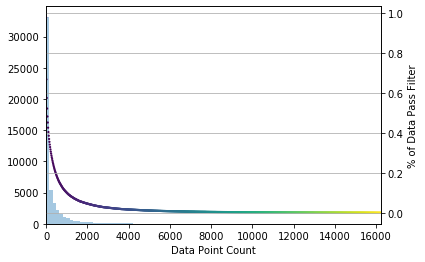

In [9]:
fig, axes = cutoff_vs_cell_remain(mcds[f'{clustering_feature}_da'].sel(count_type='cov', mc_type='CHN').mean(axis=0))
fig.savefig(fig_dir / f'{study_name}_region_mean_CHN_cov.svg')

#### Apply filter

In [10]:
before = mcds.coords[clustering_feature].size
mcds = mcds.filter_region_cov(dim=clustering_feature, 
                              da=f'{clustering_feature}_da', 
                              mc_type='CHN', 
                              min_cov=min_feature_cov, 
                              max_cov=max_feature_cov)
after = mcds.coords[clustering_feature].size
print(f'Filter {clustering_feature} by [{min_feature_cov}, {max_feature_cov}], '
      f'filter rate {(after / before):.2f}. {after} features remained.')

Filter gene by [50, 5000], filter rate 0.51. 27009 features remained.


### Calculate mC rate matrix

####  Chrombin rate
- The major difference in methylation and RNA data preprocess is this step. RNA only have read counts, but methylation have to counts: covered cytosine and methylated cutosine. In features that's uncovered, calculating mC Rate will introduce NaN value.
- We use bayes method to calculate posterior rate similar to the method described in [(Smallwood et al.)](https://www.nature.com/articles/nmeth.3035). This also did a naive imputation (by prior) so the resulting matrix don't have NaN.
- Posterior rate based on beta-binomial distribution
- Normalize per cell
- Clip extreme value

In [11]:
mcds.add_mc_rate(dim=clustering_feature, da=f'{clustering_feature}_da')

In [12]:
mcds[f'{clustering_feature}_da_rate']

<xarray.DataArray 'gene_da_rate' (mc_type: 2, cell: 5313, gene: 27009)>
array([[[1.215561, 1.322822, ..., 0.120303, 0.088989],
        [1.139045, 0.726387, ..., 0.157606, 0.078477],
        ...,
        [1.277219, 0.99587 , ..., 1.      , 1.      ],
        [1.      , 1.207842, ..., 0.051891, 0.300667]],

       [[0.559562, 0.222709, ..., 0.608272, 0.282467],
        [0.616536, 0.691378, ..., 2.380098, 0.255758],
        ...,
        [0.254547, 0.779649, ..., 1.      , 1.      ],
        [1.008821, 0.41732 , ..., 1.318439, 2.468172]]])
Coordinates:
  * mc_type  (mc_type) object 'CGN' 'CHN'
  * cell     (cell) object '3C_M_0' '3C_M_1' '3C_M_10' ... '4B_M_998' '4B_M_999'
  * gene     (gene) object 'ENSMUSG00000103377.1' ... 'ENSMUSG00000064370.1'

### Select 2D matrix to do clustering

In [13]:
ch_adata = mcds.to_ann(f'{clustering_feature}_da_rate', var_dim=clustering_feature, mc_type='CHN')
cg_adata = mcds.to_ann(f'{clustering_feature}_da_rate', var_dim=clustering_feature, mc_type='CGN')

# get feature mean coverage too
ch_feature_mean_cov = mcds[f'{clustering_feature}_da'].sel(count_type='cov', mc_type='CHN').mean(dim='cell')
cg_feature_mean_cov = mcds[f'{clustering_feature}_da'].sel(count_type='cov', mc_type='CGN').mean(dim='cell')

### Calculate highly variable feature
- Silimar to Scanpy, use normalized dispersion in each bin to select highly vairable featuer
- Scanpy only nromalize by mean for RNA feature selection, here we normalize by both mean mC% and cov

#### mCH

In [14]:
ch_hvf_result = highly_variable_methylation_feature(
    ch_adata, ch_feature_mean_cov,
    min_disp=None, max_disp=None,
    min_mean=min_ch_hvf_mean, max_mean=max_ch_hvf_mean,
    n_top_feature=ch_hvf_top, bin_min_features=5,
    mean_binsize=0.05, cov_binsize=100)

##### Visualize selected features

Total Feature Number:     27009
Highly Variable Feature:  5000 (18.5%)


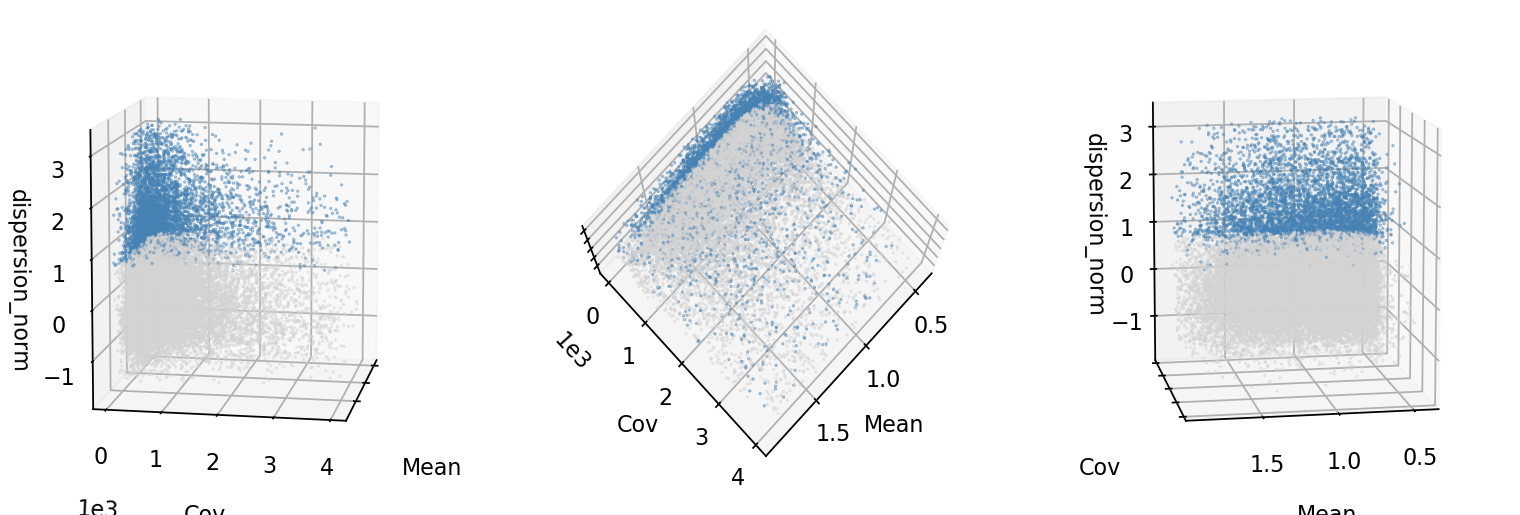

In [15]:
selection = ch_hvf_result['gene_subset']
print(f'Total Feature Number:     {selection.size}')
print(f'Highly Variable Feature:  {selection.sum()} ({(selection.sum() / selection.size * 100):.1f}%)')

fig, axes = plot_dispersion(ch_hvf_result, hue='gene_subset',
                            zlab='dispersion_norm', data_quantile=(0.01, 0.99),
                            save_animate_path=None, fig_kws=None)
fig.savefig(fig_dir / f'{study_name}_ch_highly_variable_feature.chrom100k.png', bbox_inches='tight')

#### mCG

In [16]:
cg_hvf_result = highly_variable_methylation_feature(
    cg_adata, cg_feature_mean_cov,
    min_disp=None, max_disp=None,
    min_mean=min_cg_hvf_mean, max_mean=max_cg_hvf_mean,
    n_top_feature=cg_hvf_top, bin_min_features=5,
    mean_binsize=0.01, cov_binsize=10)

68% feature with < 10 mean cov, consider filter by cov before find highly variable feature. Otherwise some low coverage feature may be elevated after normalization.


##### Visualize selected features

Total Feature Number:     27009
Highly Variable Feature:  5000 (18.5%)


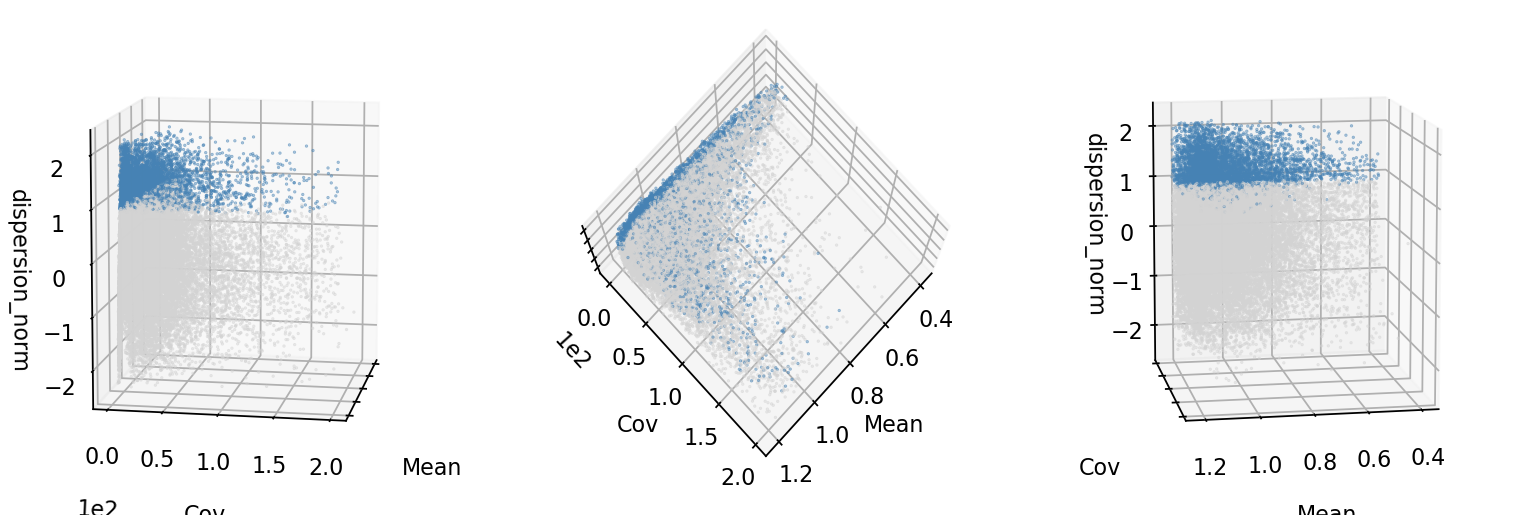

In [17]:
selection = cg_hvf_result['gene_subset']
print(f'Total Feature Number:     {selection.size}')
print(f'Highly Variable Feature:  {selection.sum()} ({(selection.sum() / selection.size * 100):.1f}%)')

fig, axes = plot_dispersion(cg_hvf_result, hue='gene_subset',
                            zlab='dispersion_norm', data_quantile=(0.01, 0.99),
                            save_animate_path=None, fig_kws=None)
fig.savefig(fig_dir / f'{study_name}_cg_highly_variable_feature.chrom100k.png', bbox_inches='tight')

#### Apply feature selection

In [18]:
ch_adata = ch_adata[:, ch_hvf_result['gene_subset']].copy()
cg_adata = cg_adata[:, cg_hvf_result['gene_subset']].copy()

## Dimention reduction

### Scale data

In [19]:
sc.pp.scale(ch_adata)
sc.pp.scale(cg_adata)

### PCA separately

#### CH PCA

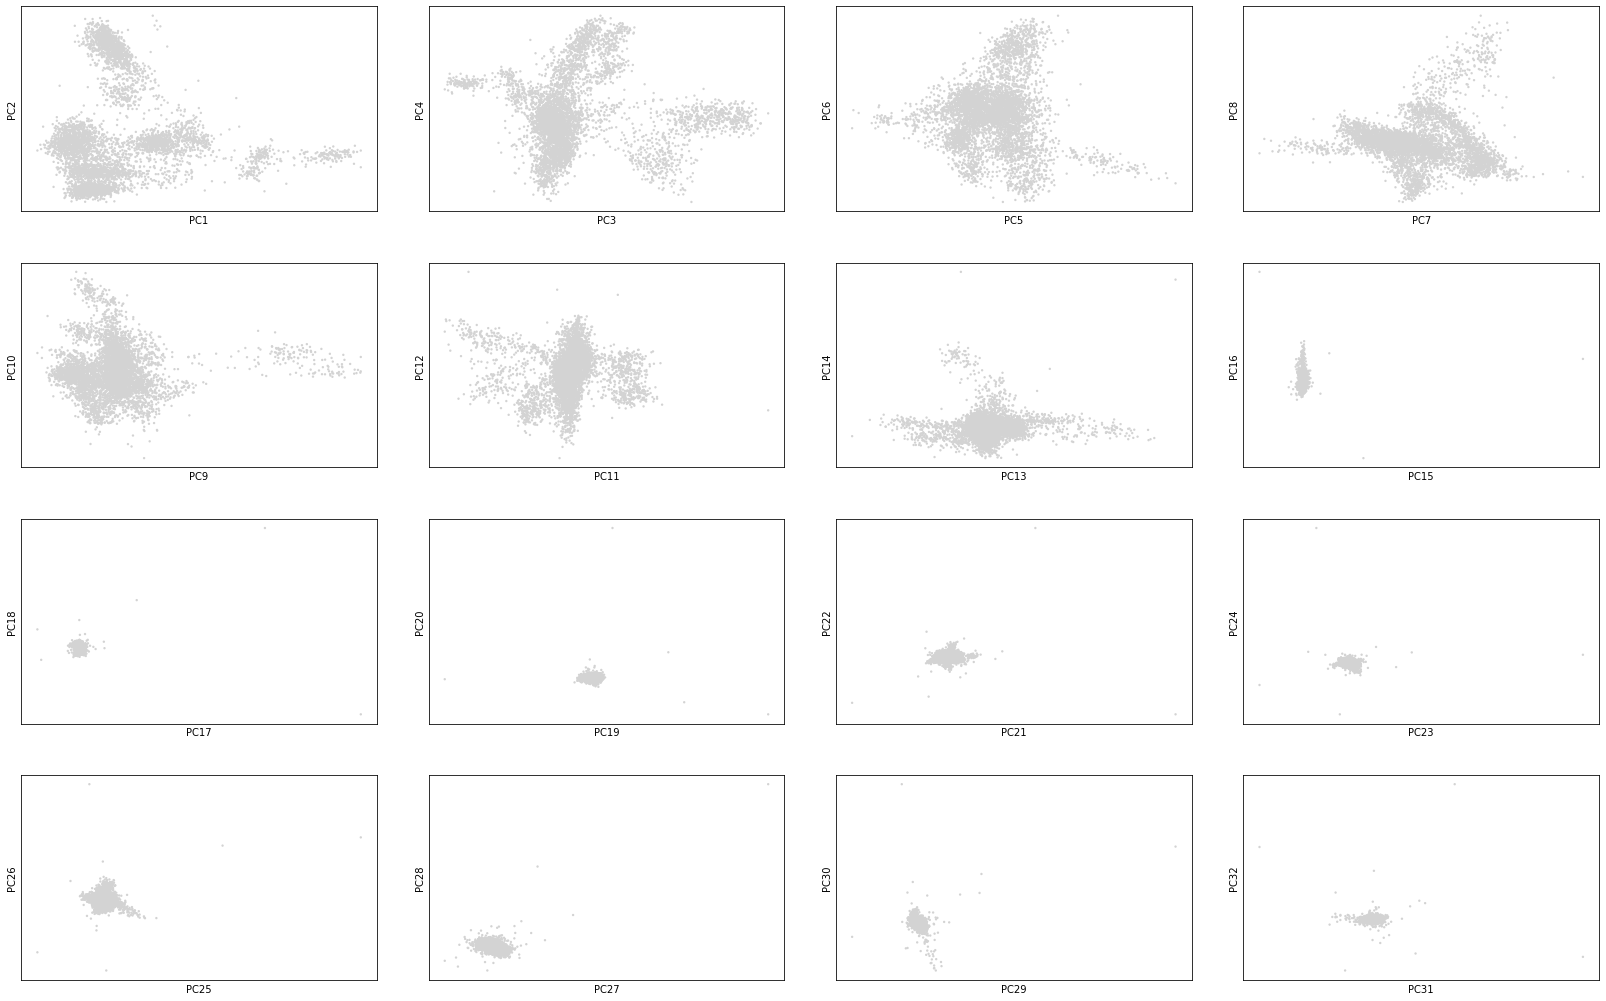

In [20]:
sc.tl.pca(ch_adata, n_comps=50)
sc.pl.pca(ch_adata, components=['1,2', '3,4', '5,6','7,8', 
                                '9,10', '11,12','13,14', '15,16', 
                                '17,18', '19,20', '21,22', '23,24', 
                                '25,26', '27,28', '29,30', '31,32'])

#### CG PCA

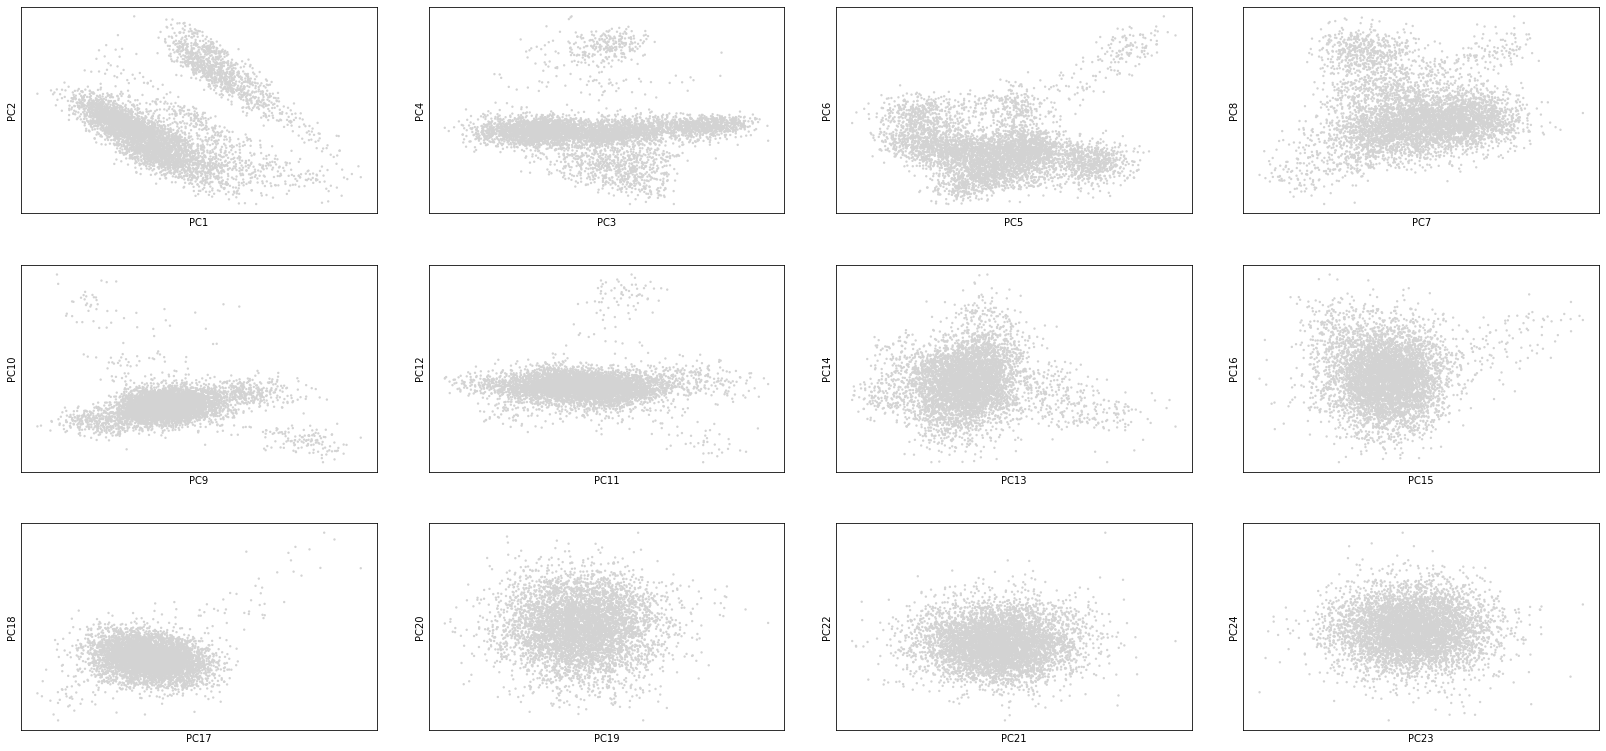

In [21]:
sc.tl.pca(cg_adata, n_comps=50)
sc.pl.pca(cg_adata, components=['1,2', '3,4', '5,6','7,8', 
                                '9,10', '11,12','13,14', '15,16',
                                '17,18', '19,20', '21,22', '23,24'])

#### Concatenate PC

In [22]:
total_pca = np.concatenate([ch_adata.obsm['X_pca'][:, :ch_pc_components], 
                            cg_adata.obsm['X_pca'][:, :cg_pc_components]], 
                           axis=1)
adata = ch_adata.copy()
adata.obsm['X_pca'] = total_pca

In [23]:
adata.X = None
adata.write_h5ad(result_dir / 'MOp.adata.PCA_only.h5ad')
adata.X = ch_adata.X

## Batch correction
- Ususally, if we saw large batch effect, we will do correction at this step
- MOp data don't seems to have large batch effect

## Clustering

### KNN

In [24]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    sc.pp.neighbors(adata, n_neighbors=n_neighbors)

### Leiden

In [25]:
sc.tl.leiden(adata, resolution=resolution)

### Manifold Learning

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


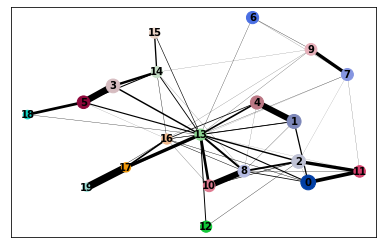

In [26]:
sc.tl.paga(adata, groups='leiden')
sc.pl.paga(adata)
sc.tl.umap(adata, init_pos='paga')
sc.tl.tsne(adata, n_jobs=40)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


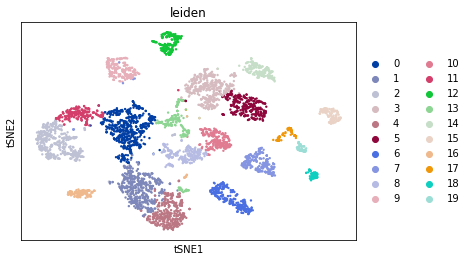

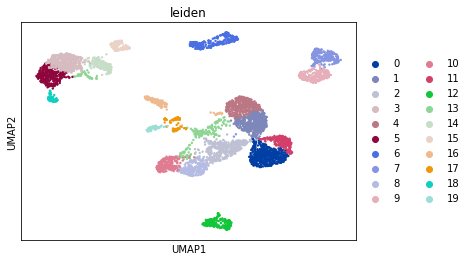

In [27]:
sc.pl.tsne(adata, color='leiden')
sc.pl.umap(adata, color='leiden')

In [28]:
adata.X = None
adata.write_h5ad(result_dir / 'MOp.adata.gene.clustering_analysis.h5ad')